### Student Information
Name: 徐迺茜

Student ID: 109065504

GitHub ID: s105021127

Kaggle name: Nai-Chien Hsu

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here

# Part 1

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [2]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [6]:
#### Answer here
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#### Print train dataset
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_df.text)

In [8]:
# term frequency count in positive comments
pos_term_frequencies = train_counts.toarray().sum(axis=0)

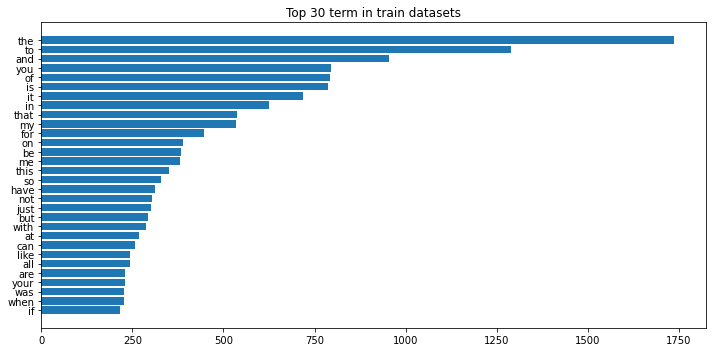

In [9]:
# plot the top 30 term with most appearance in positive comment

N = 30
index = np.arange(N)

pos_top_30_term = []
for i in np.argsort(pos_term_frequencies)[::-1][:N]:
    pos_top_30_term.append(count_vect.get_feature_names()[i])
y = np.sort(pos_term_frequencies)[::-1][:N]

fig = plt.figure(figsize=(10, 5))
ax = fig.subplots()

ax.set_title('Top 30 term in train datasets')
ax.barh(index, y, align='center')
ax.set_yticks(index)
ax.set_yticklabels(pos_top_30_term)
ax.invert_yaxis()

fig.tight_layout()
plt.show()

In [10]:
#### Print test dataset
count_vect = CountVectorizer()
test_counts = count_vect.fit_transform(test_df.text)

In [11]:
# term frequency count in positive comments
pos_term_frequencies = test_counts.toarray().sum(axis=0)

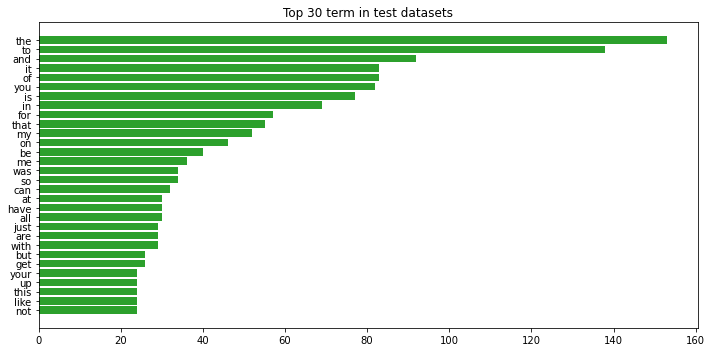

In [12]:
# plot the top 30 term with most appearance in positive comment

N = 30
index = np.arange(N)

pos_top_30_term = []
for i in np.argsort(pos_term_frequencies)[::-1][:N]:
    pos_top_30_term.append(count_vect.get_feature_names()[i])
y = np.sort(pos_term_frequencies)[::-1][:N]

fig = plt.figure(figsize=(10, 5))
ax = fig.subplots()

ax.set_title('Top 30 term in test datasets')
ax.barh(index, y, align='center', color = 'tab:green')
ax.set_yticks(index)
ax.set_yticklabels(pos_top_30_term)
ax.invert_yaxis()

fig.tight_layout()
plt.show()

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
# generate tfidf features
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(train_df['text'])
tfidf_vect.get_feature_names()[100:110]

['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

In [15]:
import nltk
# Answer here
# build analyzers (tfidf)
tfidf_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
tfidf_1000.fit(train_df['text'])

tfidf_1000.get_feature_names()[100:110]

C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


['awareness',
 'away',
 'awe',
 'awesome',
 'awful',
 'b',
 'back',
 'bad',
 'ball',
 'balls']

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

#### Answer here
1. The above figure is the result of drawing the confusion matrix, which is used to judge how many predicted values and actual values are correct, and how many are predicted other errors.
---
2. The addition of the row numbers is the "support". For example, the support of fear = 110. The upper left to the lower right part of this figure represents how much of each emotion is predicted correctly.
---
3. The darker the color in the picture above means that there are more values that meet the conditions of the area. We can observe that (fear, fear) has a maximum value of 73, but this does not mean that we can predict "fear" correctly compared to other articles in the article. This is because the "support" value of each emotion is different. To determine which emotion can be predicted correctly, you should look at the ratio, not just look at the numbers in the figure above.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

### Preparation

In [16]:
import nltk

# build analyzers (bag-of-words) # max_features=500 : 抓前500個頻率最高的字
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CountVectorizer(max_features=500,
                tokenizer=<function word_tokenize at 0x0000024780BB5700>)

In [17]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

###  Naive Bayes
Using scikit-learn ```MultinomialNB``` performs word frequency and uses these as features to train a model. 

In [18]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

## build NB model
NB_model = MultinomialNB()

## training!
NB_model = NB_model.fit(X_train, y_train)

## predict!
y_NBtrain_pred = NB_model.predict(X_train)
y_NBtest_pred = NB_model.predict(X_test)

## so we get the pred result
y_NBtest_pred[:10] 

array(['fear', 'fear', 'anger', 'joy', 'anger', 'fear', 'sadness', 'fear',
       'sadness', 'fear'], dtype='<U7')

In [19]:
y_NBtrain_pred[1000:1010]

array(['anger', 'joy', 'fear', 'joy', 'fear', 'fear', 'anger', 'anger',
       'sadness', 'fear'], dtype='<U7')

In [20]:
y_train[1000:1010]

243       anger
3132    sadness
1000       fear
2500        joy
1537       fear
1136       fear
201       anger
793       anger
1601       fear
1656       fear
Name: emotion, dtype: object

### Results Evaluation - Naive Bayes
Now we will check the results of our model's performance

In [21]:
## accuracy
from sklearn.metrics import accuracy_score

acc_NBtrain = accuracy_score(y_true=y_train, y_pred=y_NBtrain_pred)
acc_NBtest = accuracy_score(y_true=y_test, y_pred=y_NBtest_pred)

print('training accuracy: {}'.format(round(acc_NBtrain, 2)))
print('testing accuracy: {}'.format(round(acc_NBtest, 2)))  

training accuracy: 0.79
testing accuracy: 0.69


In [22]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_NBtest_pred))

              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.72      0.77      0.75       110
         joy       0.76      0.70      0.73        79
     sadness       0.63      0.62      0.63        74

    accuracy                           0.69       347
   macro avg       0.69      0.69      0.69       347
weighted avg       0.70      0.69      0.69       347



In [23]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

NBcm = confusion_matrix(y_true=y_test, y_pred=y_NBtest_pred) 
print(NBcm)

[[55 15  5  9]
 [ 8 85  5 12]
 [10  8 55  6]
 [11 10  7 46]]


In [24]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

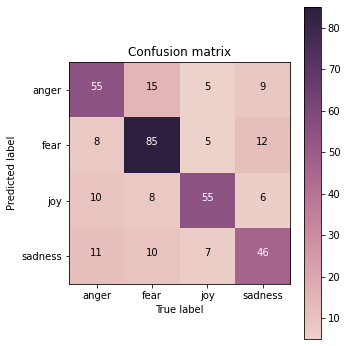

In [25]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(NBcm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

#### Answer here
---

1. Since the testing accuracy of the Naive Bayes model is bigger than the testing accuracy of the Decision Tree model, the Naive Bayes model predicts better than the Decision Tree model.

---
2. But the training accuracy of the Naive Bayes is only about 0.79, this may be related to the Naive Bayes model treating each condition as independent.

---

3. The test results show that the emotion data of y_train_pred[:10] and y_NBtrain_pred[:10] are the same as y_train[:10]. However, y_NBtrain_pred[1000:1010] only has 6 datas same as y_train[1000:1010], and y_train_pred[1000:1010] is still the same as y_train[1000:1010]

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [26]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.391641,1.311551,0.466859,1.241818
1,1,0.678937,0.925687,0.674352,0.877126
2,2,0.799613,0.555172,0.711816,0.755426
3,3,0.855245,0.403201,0.691643,0.758570
4,4,0.886244,0.318630,0.685879,0.822237
5,5,0.906726,0.267341,0.677233,0.824588
6,6,0.925547,0.221620,0.711816,0.878184
7,7,0.940493,0.187170,0.694524,0.912391
8,8,0.951010,0.155677,0.691643,1.000566
9,9,0.960974,0.141598,0.680115,1.077818


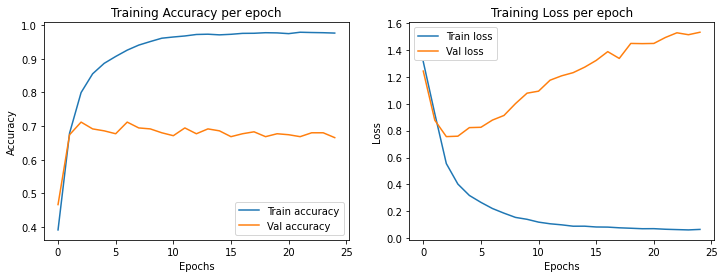

In [27]:
# Answer here
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(training_log['epoch'], training_log['accuracy'],label = 'Train accuracy')
plt.plot(training_log['epoch'], training_log['val_accuracy'],label='Val accuracy')
plt.title("Training Accuracy per epoch") # title
plt.ylabel("Accuracy") # y label
plt.xlabel("Epochs") # x label
plt.legend() # print out labels

plt.subplot(122)
plt.plot(training_log['epoch'], training_log['loss'],label = 'Train loss')
plt.plot(training_log['epoch'], training_log['val_loss'],label='Val loss')
plt.title("Training Loss per epoch") # title
plt.ylabel("Loss") # y label
plt.xlabel("Epochs") # x label
#plt.grid(True) # grid
plt.legend() # print out labels

plt.show()

### Explaination
---
1. From the left picture, we can know that the larger the Epochs, the larger the train accuracy will be; and the right picture shows that the larger the Epochs, the smaller the train accuracy will be.
---
2. From the left picture, we can see that when Epochs>=4, the val accuracy does not change much, and even decreases slowly.
---
3. From the picture on the right, it can be found that when Epochs=4, Val Loss has a minimum value, and then becomes larger and larger. It can be found that after Epochs exceeds 4, the larger the value, the greater the overfitting.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

#### Answer here
---
Because we already have word vectors, if we want to know the output data of a sequence of words (or say sentence), we can add all the word vectors that have appeared to observe the result.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

### 7.1 Prepare training corpus

In [28]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))

In [29]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values

In [30]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

In [31]:
# Answer here
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in word2vec_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in word2vec_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in word2vec_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in word2vec_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'blessed', 'MHchat', 'MrHenvin', 'smile', 'PUSSY\\nP', 'birthday', 'bday', 'help', 'Be', 'ship', 'kinda', 'trusted', 'plz', '🕋', 'depress']
angry_words:  ['angry', 'win', 'Please', 'sober', 'travel', 'questions', 'melancholic', 'bitter', 'subsidised', 'furious', 'badly', 'cats', 'forever', 'describe', 'simultaneously', 'indeed']
sad_words:  ['sad', 'funny', 'Looks', 'cats', 'Bad', 'hilarious', 'play', 'acc', 'Patti', 'lost', 'won', 'nervouswreck', 'What', 'Who', 'real', 'results']
fear_words:  ['fear', 'photos', 'Choose', '\\n\\nThis', 'happiness', 'foreveralone', 'crocodile', 'pakistani', 'nation', 'violence', 'Time', 'anger', 'story', 'thoughts', 'leaves', 'opposite']

target words: 
['happy', 'blessed', 'MHchat', 'MrHenvin', 'smile', 'PUSSY\\nP', 'birthday', 'bday', 'help', 'Be', 'ship', 'kinda', 'trusted', 'plz', '🕋', 'depress', 'angry', 'win', 'Please', 'sober', 'travel', 'questions', 'melancholic', 'bitter', 'subsidised', 'furious', 'badly', 'cats', 'forev

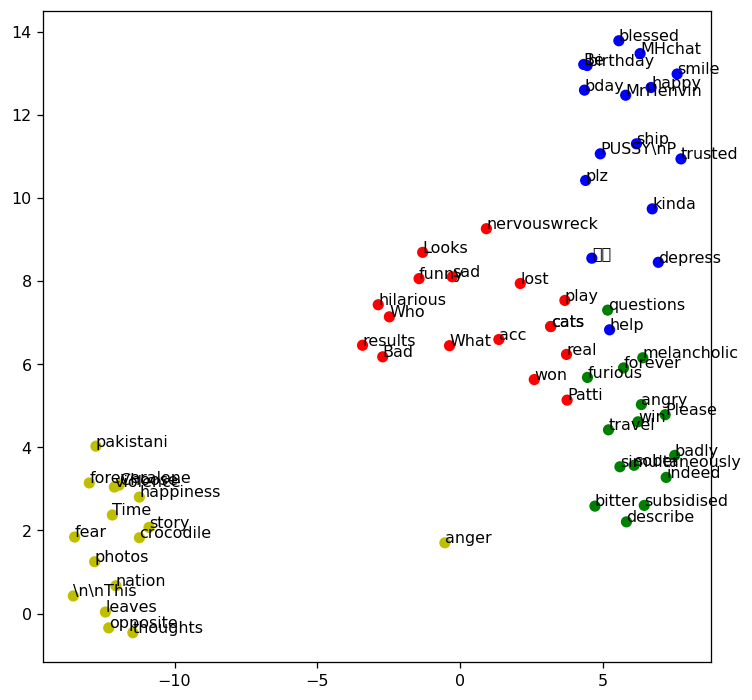

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = word2vec_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.wv.vocab.keys()) 
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
# Part 3